In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


![](https://www.mcgill.ca/oss/files/oss/styles/hd/public/fish_2.jpg?itok=tiod_UxK&timestamp=1582137895)

#### **Problem Statement**: we have been provided with image data set of different categorical fishes. objective is to create a model that identifies the fish category based on the picture. 

#### I have tried with Conv2d, Resenet & Mobilenet. MobileNet provides more accuracy than other models. 

# Read Dataset

Generating Dataframe with image path and label

In [2]:
dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [3]:
df.head()

,path,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


DataFrame is create with 2 colmuns, 
1. path will have the paths to impage in the folder 
2. Label will have the corresponding label name for the image

In [5]:
df['label']=df['label'].astype('category')

Converting the "label" column as category type

In [6]:
df['label'].value_counts()

Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Sea Bass              1000
Red Sea Bream         1000
Red Mullet            1000
Hourse Mackerel       1000
Gilt-Head Bream       1000
Black Sea Sprat       1000
Name: label, dtype: int64

There are 9 category of fishes and each are unifromly distrubuted. so no prob on imbalance in the data

# Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df['label'].unique()

['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']
Categories (9, object): ['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', ..., 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']

**Let us try plot the 1 sample image from each category**

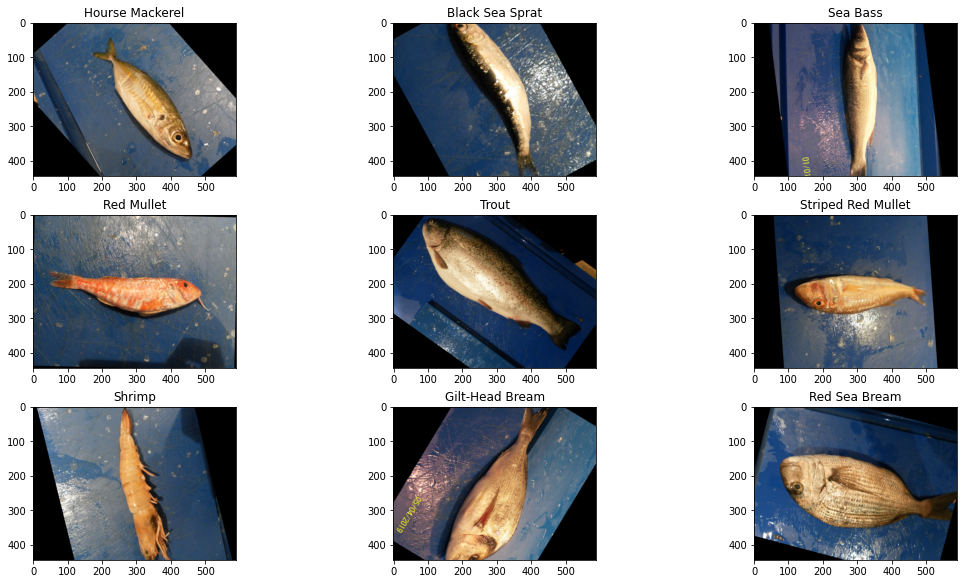

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():
    
    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

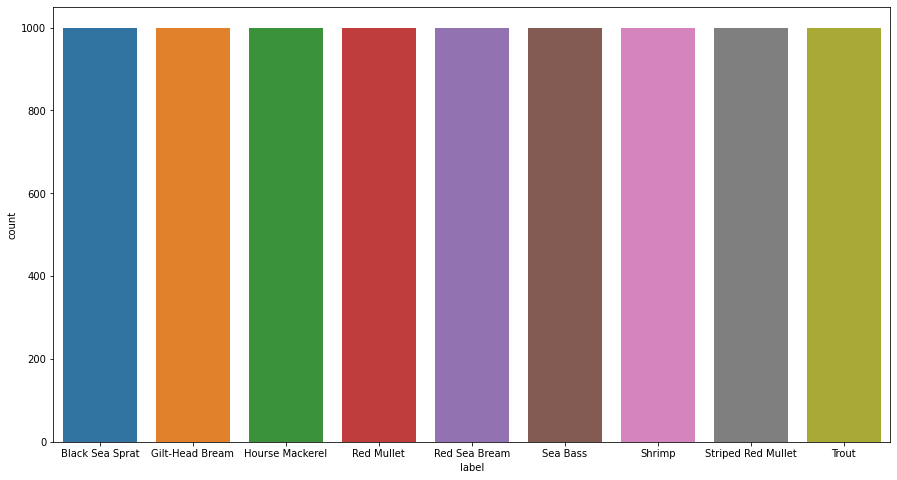

In [10]:
fig=plt.figure(figsize=(15,8))
sns.countplot(df['label'])

In [11]:
plt.imread(df['path'][1]).shape

(445, 590, 3)

# Train Test split

In [12]:

from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(7200, 2)
(1800, 2)


## Creating the image dataset using Tensorflow 
### we are using resnet_v2 preprocessing step to check if we can use Reset model in trasform learning

In [14]:
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)
X_train_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
X_val_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
X_test_img =testGen.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 5040 validated image filenames belonging to 9 classes.
Found 2160 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


- `ResNet50V2` and `MobileNetV2`: Pre-trained models from Keras for transfer learning. These models are trained on `ImageNet` and can be used for feature extraction or fine-tuning.
- `preprocess_input`: A function provided by Keras that preprocesses images to match the input format expected by ResNet models (e.g., normalizing pixel values).
- ImageDataGenerator: A utility to augment image data and preprocess images for training machine learning models.

### Plotting image after preprocessing

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


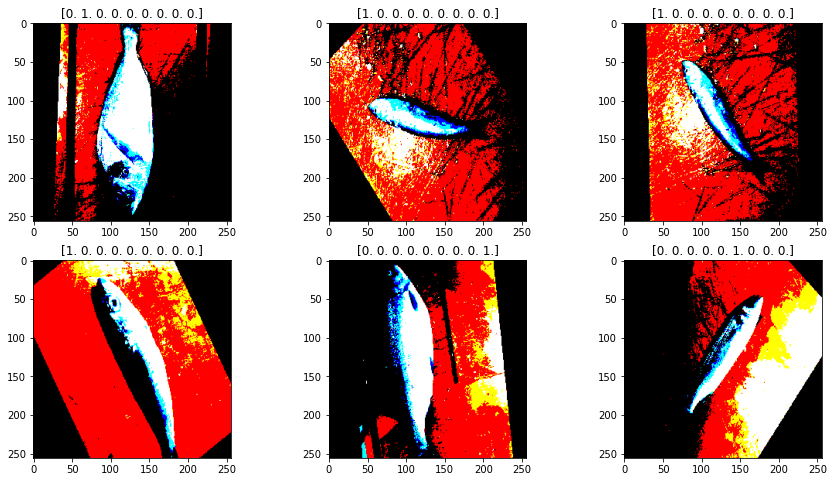

In [15]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = X_test_img.next()
    #print(img.shape)   #  (1,256,256,3)
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    #plt.show()
    j=j+1

In [16]:
X_test_img[0][0].shape

(32, 256, 256, 3)

In [17]:
image_shape=(256,256,3)

#### Lets check the classes are appropriate in both Test & Train dataset

In [18]:
X_train_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [19]:
X_val_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [20]:
X_test_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

# Tensorflow Model
#### MobileNet Transfer learning
I tried with both Resnet & MobileNet, MobileNet gives better accuracy result

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=image_shape)

#for layers in pre_trained.layers:
#    layers.trainable=False
pre_trained.trainable=False

inp_model = pre_trained.input
#x=Flatten()(pre_trained.output)
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(128, activation='relu')(x)
output=Dense(9, activation='softmax')(x)
model = Model(inputs=inp_model, outputs=output)




model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results = model.fit(X_train_img,epochs=30,
                              validation_data=X_val_img,
                                callbacks=[early_stop])


9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/30
158/158 [==============================] - 162s 992ms/step - loss: 1.8166 - accuracy: 0.3320 - val_loss: 0.7566 - val_accuracy: 0.7366
Epoch 2/30
158/158 [==============================] - 81s 512ms/step - loss: 0.8998 - accuracy: 0.6738 - val_loss: 0.4921 - val_accuracy: 0.8259
Epoch 3/30
158/158 [==============================] - 80s 509ms/step - loss: 0.6671 - accuracy: 0.7611 - val_loss: 0.3814 - val_accuracy: 0.8708
Epoch 4/30
158/158 [==============================] - 80s 508ms/step - loss: 0.5216 - accuracy: 0.8079 - val_loss: 0.3005 - val_accuracy: 0.9065
Epoch 5/30
158/158 [==============================] - 80s 509ms/step - loss: 0.4284 - accuracy: 0.8414 - val_loss: 0.2487 - val_accuracy: 0.9079
Epoch 6/30
158/158 [==============================] - 81s 514ms/step - loss: 0.3837 - accuracy: 0.8670 - val_loss: 0.2322 - val_accuracy: 0.9218
Epoch 7/30
158/158 [==============================] - 81s 514ms/st

Text(0.5, 1.0, 'Loss')

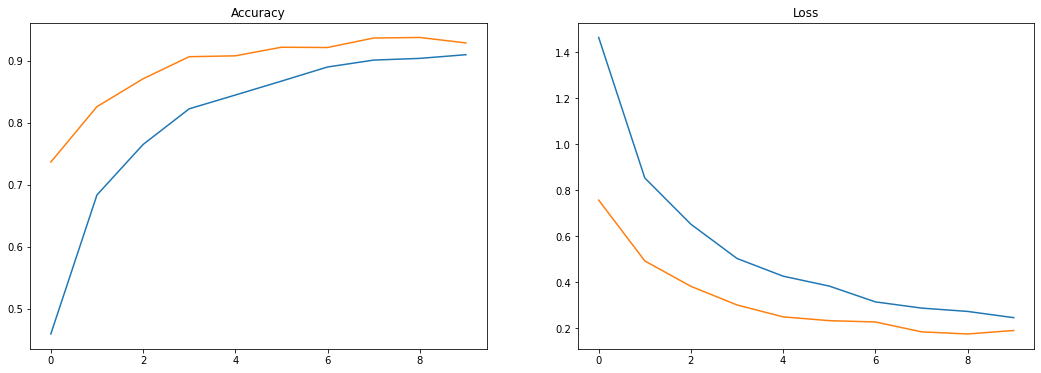

In [26]:
result=pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")


# Model Prediction

In [23]:
pred = model.predict(X_test_img)
pred=np.argmax(pred,axis=1)

In [24]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])
    

Accuracy Score: 0.9327777777777778


<AxesSubplot:>

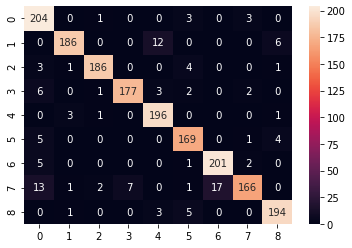

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

                                                   path            label  \
7940  ../input/a-large-scale-fish-dataset/Fish_Datas...  Gilt-Head Bream   
1162  ../input/a-large-scale-fish-dataset/Fish_Datas...  Black Sea Sprat   
582   ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel   
4081  ../input/a-large-scale-fish-dataset/Fish_Datas...            Trout   
8412  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream   
8730  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream   

                 pred  
7940  Gilt-Head Bream  
1162  Black Sea Sprat  
582   Hourse Mackerel  
4081            Trout  
8412    Red Sea Bream  
8730    Red Sea Bream  


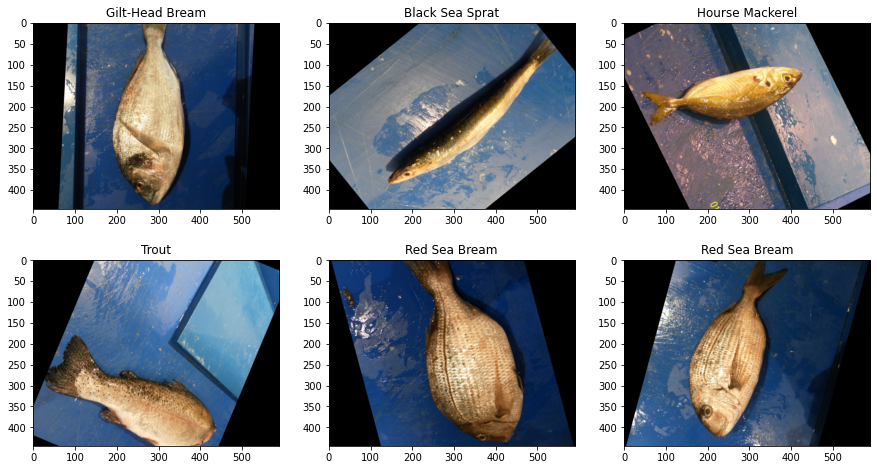

In [37]:
print(pred_df[pred_df['label']==pred_df['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['label']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['path'][i]))
    ax[i].set_title(imlist['label'][i])

Please review and provide yout comments for further improvements. 